### Importing Libraries

In [18]:
import numpy as np
import pandas as pd
# Importing required libraries
import numpy as np
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import os
# To supress warnings
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

#### The dataset is the birth count of 1 year:1959.

In [5]:
dataset = pd.read_csv(r'C:\Users\hp\Desktop\14\dataset.csv')

In [4]:
dataset.head()

,Date,Births
0,1/1/1959,35
1,1/2/1959,32
2,1/3/1959,30
3,1/4/1959,31
4,1/5/1959,44


In [5]:
dataset.isna().sum() ##Checking the Null values.

Date      0
Births    0
dtype: int64

In [6]:
dataset['Date'] = pd.to_datetime(dataset.Date) ##converting the date column in a proper format.

In [7]:
dataset.head()  ##This is how the dataset looks like.

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [8]:
dataset.set_index(dataset['Date'], inplace = True) ## Removing the Index column and replacing them with Date.
dataset.drop('Date', axis=1, inplace = True)

In [9]:
dataset.head() ## This is how the dataset looks like.

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [10]:
dataset.tail()

,Births
Date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


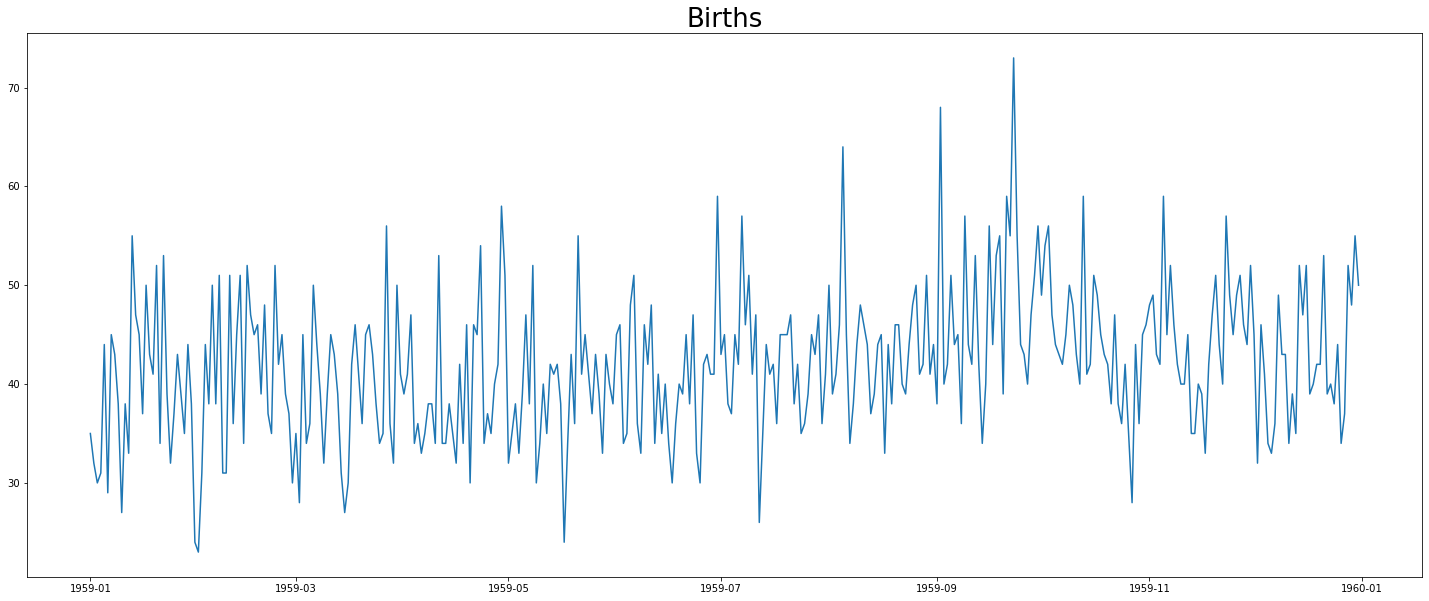

In [11]:
# Plotting the predicted values as compared to actual values
plt.figure(figsize=(25,10))
plt.plot(dataset['Births'], label = 'Data')
plt.title("Births", size = 26)
plt.show()

In [12]:
# Train and Test split
# Splitting as train and test data.
train = dataset.loc[:"1959-09-01"]
test = dataset.loc["1959-09-01" : ]

In [22]:
train.tail()

,Births
Date,
1959-08-28,42
1959-08-29,51
1959-08-30,41
1959-08-31,44
1959-09-01,38


In [23]:
test.head()

,Births
Date,
1959-09-01,38
1959-09-02,68
1959-09-03,40
1959-09-04,42
1959-09-05,51


# Naive Forecasting

In [24]:
y_hat = test.copy() # Creating a copy of test data to compare at a later stage

# Forecasting would be the last recorded value in the series
y_hat['Naive'] = train.iloc[len(train)-1][0]
y_hat

,Births,Naive
Date,,
1959-09-01,38,38
1959-09-02,68,38
1959-09-03,40,38
1959-09-04,42,38
1959-09-05,51,38
...,...,...
1959-12-27,37,38
1959-12-28,52,38
1959-12-29,48,38


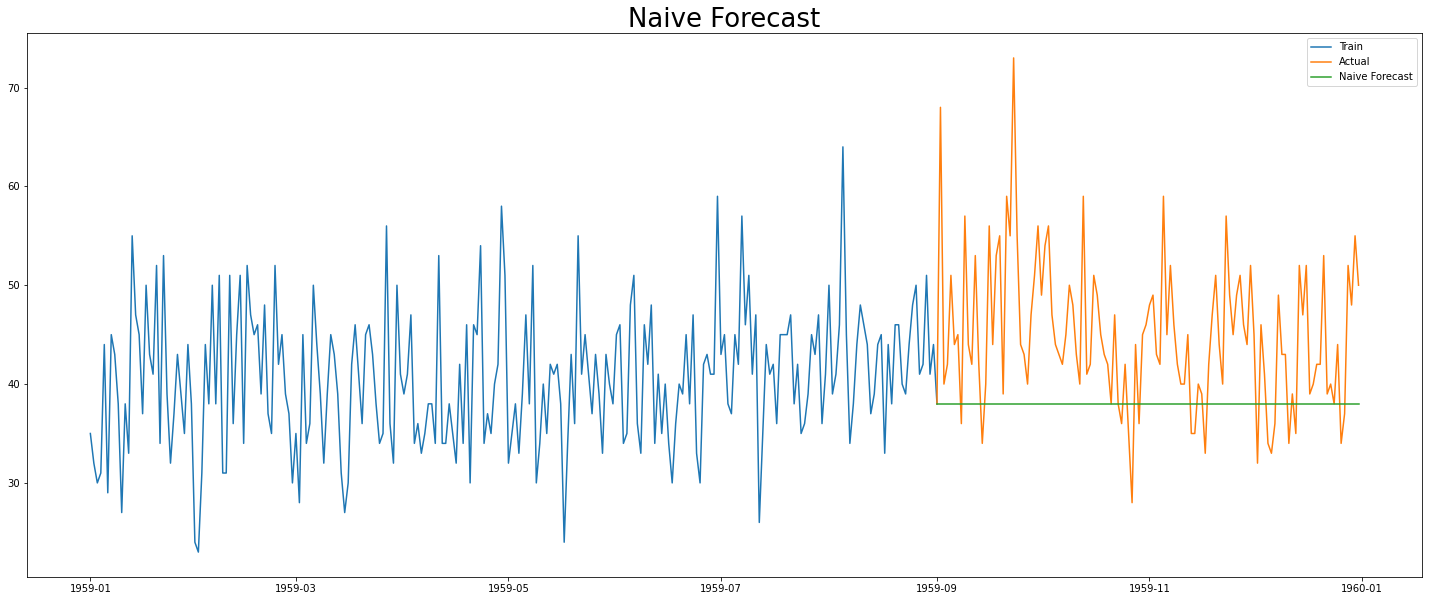

In [26]:
# Plotting the predicted values as compared to actual values
plt.figure(figsize=(25,10))
plt.plot(train['Births'], label = 'Train')
plt.plot(y_hat['Births'], label = 'Actual')
plt.plot(y_hat['Naive'], label = 'Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast", size = 26)
plt.show()

In [29]:
# Finding RMSE for Naive forecasting
rmse_naive = math.sqrt(mean_squared_error(y_hat['Births'], y_hat['Naive'])) 
print('RMSE for Naive forecast is : ', rmse_naive)
r2_naive = r2_score(y_hat['Births'], y_hat['Naive'])
print('R2 score for Naive forecast is : ', r2_naive)
# In Naive forecast method, the predicted values are just the last value 
# observed in the series.

RMSE for Naive forecast is :  10.113292664834246
R2 score for Naive forecast is :  -0.8716570439366964


# Moving Averages

## Simple Moving Averages

#### Considers current and k previous observations to calculating the average

In [32]:
# Prediction using SMA
y_hat = dataset.copy()

SMA_3 = dataset['Births'].rolling(window = 3).mean() # SMA of last 3 values
SMA_5 = dataset['Births'].rolling(window = 5).mean() # SMA of last 5 values
SMA_10 = dataset['Births'].rolling(window = 10).mean() # SMA of last 10 values

# Adding the prediction to the y_hat data frame
y_hat['SMA_3'] = SMA_3
y_hat['SMA_5'] = SMA_5
y_hat['SMA_10'] = SMA_10

y_hat

,Births,SMA_3,SMA_5,SMA_10
Date,,,,
1959-01-01,35,NaN,NaN,NaN
1959-01-02,32,NaN,NaN,NaN
1959-01-03,30,32.333333,NaN,NaN
1959-01-04,31,31.000000,NaN,NaN
1959-01-05,44,35.000000,34.4,NaN
...,...,...,...,...
1959-12-27,37,38.333333,38.6,40.9
1959-12-28,52,41.000000,41.0,42.1
1959-12-29,48,45.666667,43.0,42.7


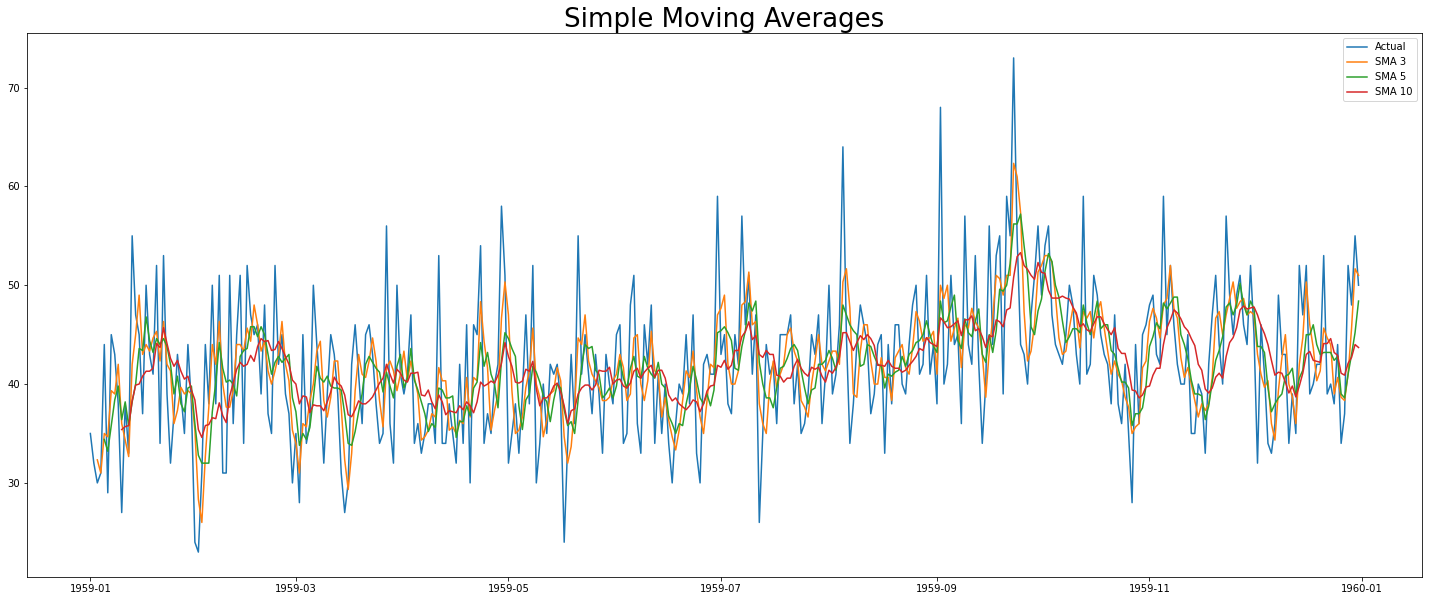

In [33]:
# Plotting the predicted values as compared to actual values
plt.figure(figsize=(25,10))
plt.plot(y_hat['Births'], label = 'Actual')
plt.plot(y_hat['SMA_3'], label = 'SMA 3')
plt.plot(y_hat['SMA_5'], label = 'SMA 5')
plt.plot(y_hat['SMA_10'], label = 'SMA 10')
plt.legend(loc='best')
plt.title("Simple Moving Averages", size = 26)
plt.show()

In [35]:
y_hat

,Births,SMA_3,SMA_5,SMA_10
Date,,,,
1959-01-01,35,NaN,NaN,NaN
1959-01-02,32,NaN,NaN,NaN
1959-01-03,30,32.333333,NaN,NaN
1959-01-04,31,31.000000,NaN,NaN
1959-01-05,44,35.000000,34.4,NaN
...,...,...,...,...
1959-12-27,37,38.333333,38.6,40.9
1959-12-28,52,41.000000,41.0,42.1
1959-12-29,48,45.666667,43.0,42.7


In [39]:
# Finding RMSE & R2 for SMA forecasting
rmse_SMA_3 = math.sqrt(mean_squared_error(y_hat['Births'].loc["1959-02-01" : ], y_hat['SMA_3'].loc["1959-02-01" : ])) 
print('RMSE for SMA_3 forecast is : ', rmse_SMA_3)
r2_SMA_3 = r2_score(y_hat['Births'].loc["1959-02-01" : ], y_hat['SMA_3'].loc["1959-02-01" : ])
print('R2 score for SMA_3 forecast is : ', r2_SMA_3*100)
rmse_SMA_5 = math.sqrt(mean_squared_error(y_hat['Births'].loc["1959-02-01" : ], y_hat['SMA_5'].loc["1959-02-01" : ])) 
print('RMSE for SMA_5 forecast is : ', rmse_SMA_5)
r2_SMA_5 = r2_score(y_hat['Births'].loc["1959-02-01" : ], y_hat['SMA_5'].loc["1959-02-01" : ])
print('R2 score for SMA_5 forecast is : ', r2_SMA_5*100)
rmse_SMA_10 = math.sqrt(mean_squared_error(y_hat['Births'].loc["1959-02-01" : ], y_hat['SMA_10'].loc["1959-02-01" : ])) 
print('RMSE for SMA_10 forecast is : ', rmse_SMA_10)
r2_SMA_10 = r2_score(y_hat['Births'].loc["1959-02-01" : ], y_hat['SMA_10'].loc["1959-02-01" : ])
print('R2 score for SMA_10 forecast is : ', r2_SMA_10*100)

RMSE for SMA_3 forecast is :  5.393282088237187
R2 score for SMA_3 forecast is :  44.74923221300718
RMSE for SMA_5 forecast is :  6.082880660159995
R2 score for SMA_5 forecast is :  29.71694387820083
RMSE for SMA_10 forecast is :  6.466597732002889
R2 score for SMA_10 forecast is :  20.570151057072593


## Simple Exponential Smoothning (SES)

- In this model the recent observations are giving more weight as compared to older one. This way we can say even Naive is a special case of exponential smoothing where the entire weight is given to only the last observation.
- This is used when there is no clear Trend or Seasonality.

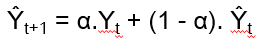

- alpha is the smoothing paramater.

In [40]:
# Package for SES
from statsmodels.tsa.api import SimpleExpSmoothing

In [41]:
y_hat = test.copy() # Creating a copy of test data to compare at a later stage

In [42]:
# Fitting a SES without smooth parameter. 
# If not specified it would be computed by the system.
# Optimized should be True

model_opt = SimpleExpSmoothing(np.asarray(train['Births'])).fit(optimized=True)
print('optimal alpha chosen:', model_opt.model.params['smoothing_level'])

optimal alpha chosen: 0.01950162556668452


In [43]:
model_opt.model.params

{'smoothing_level': 0.01950162556668452,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 39.54250580956395,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [44]:
# Forecasting
y_hat['Optimized_forecast'] = model_opt.forecast(len(y_hat)) # Model 2
y_hat.head()

,Births,Optimized_forecast
Date,,
1959-09-01,38,41.983894
1959-09-02,68,41.983894
1959-09-03,40,41.983894
1959-09-04,42,41.983894
1959-09-05,51,41.983894


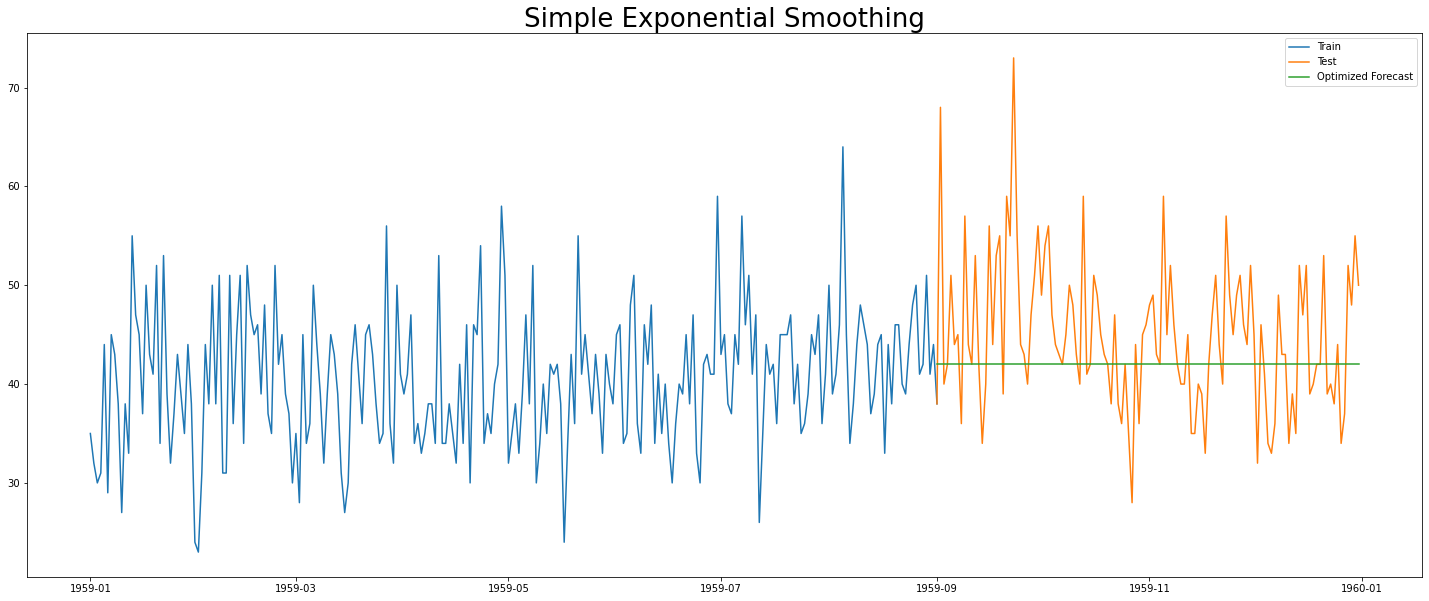

In [45]:
# Plotting the train, test data and the forecasts

plt.figure(figsize=(25,10))
plt.plot(train['Births'], label='Train')
plt.plot(test['Births'], label='Test')
plt.plot(y_hat['Optimized_forecast'], label='Optimized Forecast')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing", size = 26)
plt.show()

In [46]:
# Evaluation Metrics
rmse_SES = math.sqrt(mean_squared_error(y_hat['Births'], y_hat['Optimized_forecast'])) 
print('\nRMSE for SES with optimum alpha on test is : ', rmse_SES)
r2_SES = r2_score(y_hat['Births'], y_hat['Optimized_forecast'])
print('R2 score for SES with optimum alpha on test is : ', r2_SES*100)


RMSE for SES with optimum alpha on test is :  7.947282444837997
R2 score for SES with optimum alpha on test is :  -15.578863182548464


## Double Exponential Smoothing
- Considers trend as well. But our data doesn't show any trend.
- Used when there is trend but no seasonality.

In [47]:
y_hat = test.copy() # Creating a copy of test data to compare at a later stage

# Package for DES
from statsmodels.tsa.api import Holt

In [48]:
# Fitting the model using Holt's linear model
# Smoothing parameter automatically computed
model1 = Holt(np.asanyarray(train['Births'])).fit(optimized=True)

In [49]:
model1.params

{'smoothing_level': 1.4901206195375212e-08,
 'smoothing_trend': 5.552120759107991e-09,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 38.547869200782706,
 'initial_trend': 0.015969272201260837,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [50]:
# Forecasting with the above fitted model
y_hat['Holt Linear'] = model1.forecast(len(test))
y_hat.head()

,Births,Holt Linear
Date,,
1959-09-01,38,42.460341
1959-09-02,68,42.476310
1959-09-03,40,42.492279
1959-09-04,42,42.508249
1959-09-05,51,42.524218


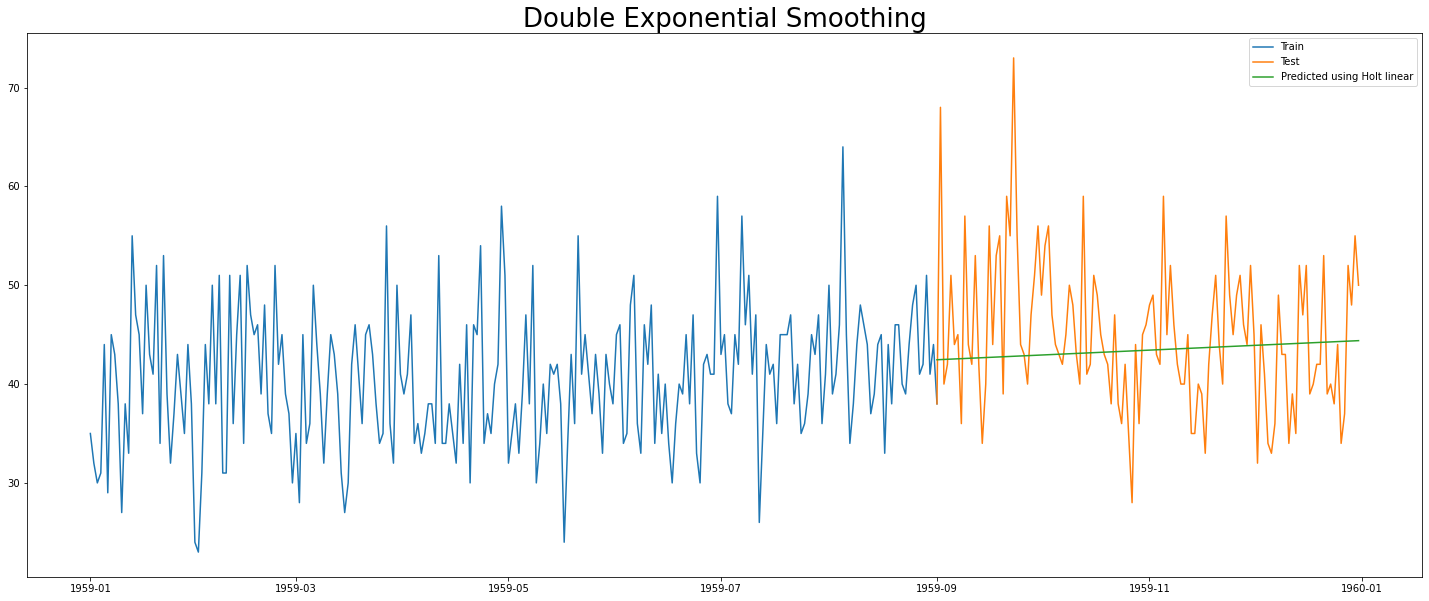

In [51]:
# Plotting the forecasted values
plt.figure(figsize=(25,10))
plt.plot(train['Births'], label='Train')
plt.plot(test['Births'], label='Test')
plt.plot(y_hat['Holt Linear'], label='Predicted using Holt linear')
plt.legend(loc='best')
plt.title("Double Exponential Smoothing", size = 26)
plt.show()

In [52]:
# Calculating the RMSE
rmse_DES = math.sqrt(mean_squared_error(test.Births, y_hat['Holt Linear']))
print('RMSE for Holt Linear is : ', rmse_DES)
r2_DES = r2_score(test.Births,y_hat['Holt Linear'])
print('R2 score for Holt Linear is : ', r2_DES*100)

RMSE for Holt Linear is :  7.684947357273063
R2 score for Holt Linear is :  -8.074420671286564


In [53]:
# Fitting the Holt's Linear Model with damped trend
model2 = Holt(np.asanyarray(train['Births']), damped=True).fit(optimized = True)

In [54]:
# Forecasting using the above fitted model
y_hat['Holt Linear Damped'] = model2.forecast(len(test))
y_hat.head()

,Births,Holt Linear,Holt Linear Damped
Date,,,
1959-09-01,38,42.460341,40.702568
1959-09-02,68,42.476310,40.702568
1959-09-03,40,42.492279,40.702568
1959-09-04,42,42.508249,40.702568
1959-09-05,51,42.524218,40.702568


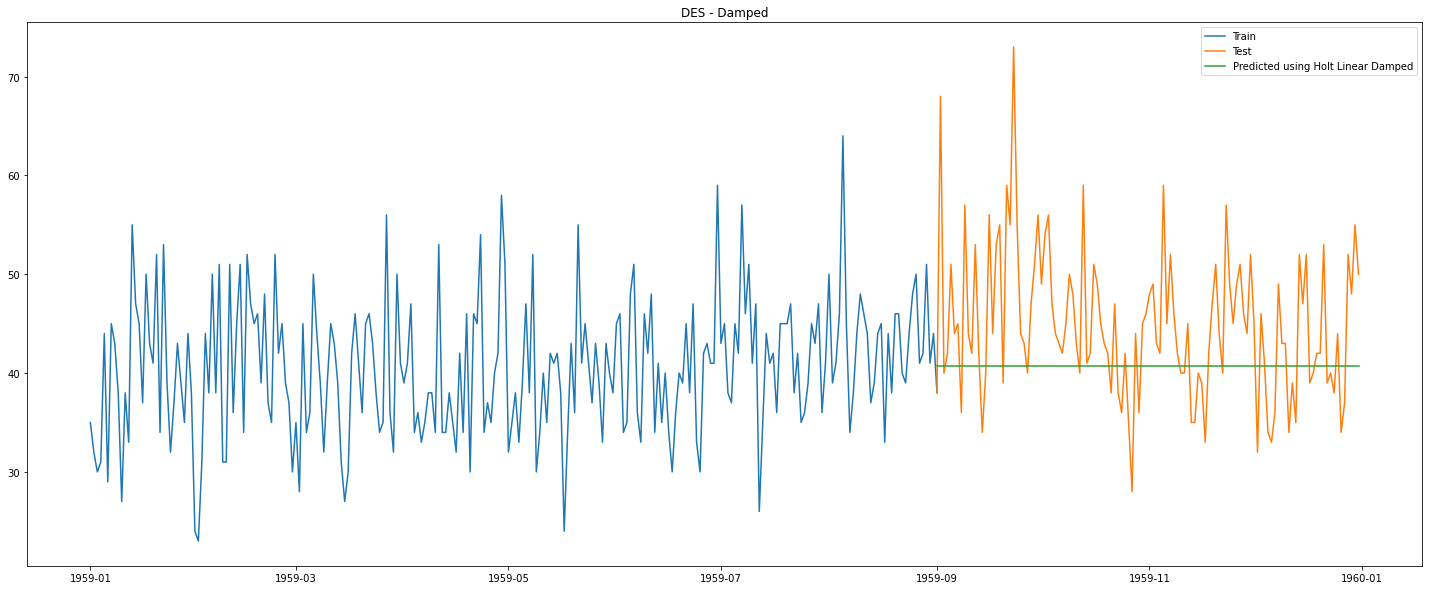

In [55]:
# Plotting the forecasted values
plt.figure(figsize=(25,10))
plt.plot(train['Births'], label='Train')
plt.plot(test['Births'], label='Test')
plt.plot(y_hat['Holt Linear Damped'], label='Predicted using Holt Linear Damped')
plt.legend(loc='best')
plt.title("DES - Damped")
plt.show()

In [56]:
rmse_DES_Dam = math.sqrt(mean_squared_error(test.Births, y_hat['Holt Linear Damped']))
print('RMSE for Holt Linear Damped model is : ', rmse_DES_Dam)
r2_DES_Dam = r2_score(test.Births, y_hat['Holt Linear Damped'])
print('R2 score for Holt Linear Damped Model is : ', r2_DES_Dam)

RMSE for Holt Linear Damped model is :  8.501662410199428
R2 score for Holt Linear Damped Model is :  -0.32266187021299175


## Triple Exponential Smoothing
- Used when there is trend and seasonality.

In [13]:
y_hat = test.copy() # Creating a copy of test data to compare at a later stage

In [14]:
model = ExponentialSmoothing(np.asarray(train['Births']), seasonal_periods=4, trend='add', seasonal='mul')
fit1 = model.fit(smoothing_level=0.0426, smoothing_slope=0.355, smoothing_seasonal=0.161, optimized=True)
y_hat['TES_add_mul'] = fit1.forecast(len(test))
y_hat

,Births,TES_add_mul
Date,,
1959-09-01,38,46.029346
1959-09-02,68,44.045165
1959-09-03,40,41.674173
1959-09-04,42,44.475568
1959-09-05,51,46.237105
...,...,...
1959-12-27,37,49.803943
1959-12-28,52,47.116816
1959-12-29,48,50.277540


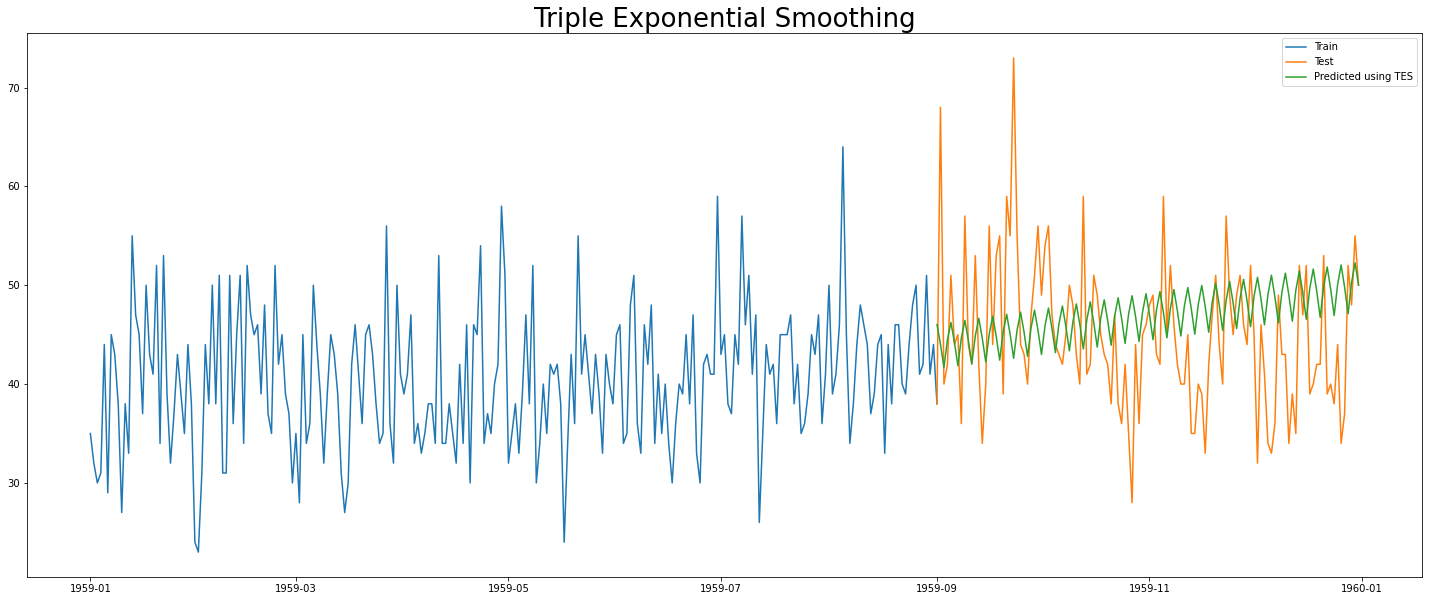

In [15]:
# Plotting the forecasted values
plt.figure(figsize=(25,10))
plt.plot(train['Births'], label='Train')
plt.plot(test['Births'], label='Test')
plt.plot(y_hat['TES_add_mul'], label='Predicted using TES')
plt.legend(loc='best')
plt.title("Triple Exponential Smoothing", size = 26)
plt.show()

In [17]:
# Calculating the RMSE
rmse_TES = math.sqrt(mean_squared_error(test.Births, y_hat['TES_add_mul']))
print('RMSE for TES is : ', rmse_TES)
r2_TES = r2_score(test.Births,y_hat['TES_add_mul'])
print('R2 score for Holt Linear is : ', r2_TES*100)

RMSE for TES is :  8.518958165354107
R2 score for Holt Linear is :  -32.80489826691604


# ACF and PACF Plot

- In ACF it tells us how much dependent the data is on it's 'p' previous lags.
- PACF - finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation.

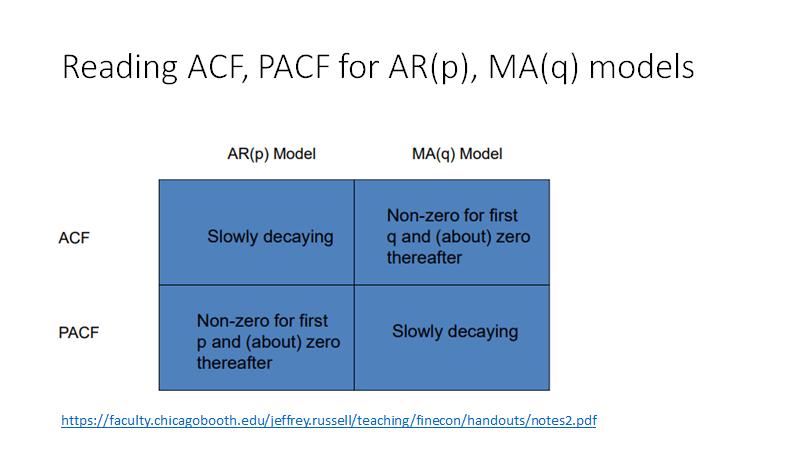

- Using PACF we get the value of p
- Using ACF we get the value of q.

In [58]:
# Imporing the package
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

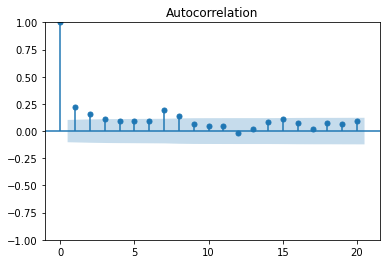

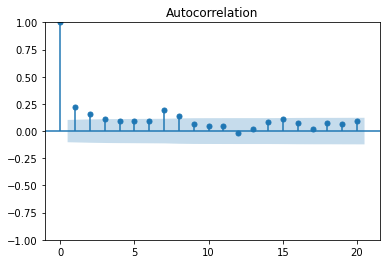

In [59]:
# Plotting the graphs for autocorrelation and partial autocorrelation
plot_acf(dataset.Births.tolist(), lags=20) # Plotting the autocorrelation

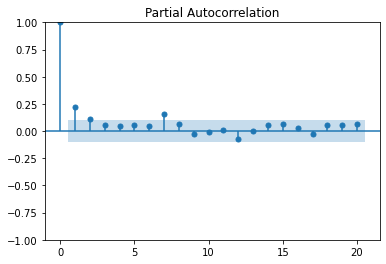

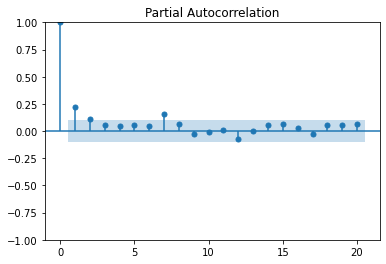

In [60]:
plot_pacf(dataset.Births.tolist(), lags=20) # Plotting the partial autocorrelation

# ARIMA Model
- Requires Stationary data, so will perform AD Fuller test.
- In ADF test, p- value should always be less than critical value. If that is not the case we go for differencing.
- ADF is a left tail test in which Alternate hypothesis is data is stationary.

In [21]:
# Importing ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [22]:
# Module Required
from statsmodels.tsa.stattools import adfuller

In [23]:
# ADF Test

result = adfuller(dataset['Births'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -4.808291253559767
p-value: 5.243412990149787e-05


In [24]:
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

Critial Values:
   1%, -3.448748905151901
Critial Values:
   5%, -2.8696473721448728
Critial Values:
   10%, -2.5710891239349585


### This shows that the data is stationary.

In [20]:
## In case the data was not stationary, we could use PCT function.
## Converting it to percentage change makes the data stationary as it revolves around a point as % change.

In [25]:
# Train and Test split
# Splitting as train and test data.
train = dataset.loc[:"1959-09-01"]
test = dataset.loc["1959-09-01" : ]

In [26]:
# Importing the modules required
from statsmodels.tsa import arima
# for auto arima
from pmdarima import auto_arima

In [27]:
# grid search and find best parameters
stepwise_fit = auto_arima(dataset['Births'], start_p = 1, 
                          start_q = 1,	max_p = 3, max_q = 3, 
                           start_P = 0, max_P = 3,seasonal = False,
                          start_Q = 0, max_Q = 3,d = 1, D = 0, trace = True, 
                          error_action ='ignore', 
                          # we don't want to know if an order does not work 
                          suppress_warnings = True, 
                          # we don't want convergence warnings
                          information_criterion='aic',
                          stepwise = True) # set to stepwise 

# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2460.154, Time=1.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2650.760, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2565.234, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2463.584, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2648.768, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2461.271, Time=0.59 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2460.722, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2536.154, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2463.065, Time=1.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2459.074, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2462.221, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2563.261, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2460.367, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Sun, 24 Jul 2022   AIC                           2459.074
Time:                        15:18:32   BIC                           2470.766
Sample:                             0   HQIC                          2463.721
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
# Fitting the best model from the auto arima
model = arima.model.ARIMA(dataset['Births'], order=(1,1,1), seasonal_order=(0,0,0,0)).fit()

In [29]:
# Model Prediction
y_hat = test.copy()
y_hat['ARIMA'] = model.predict(start="1959-09-01", end="1959-12-31", dynamic=True)

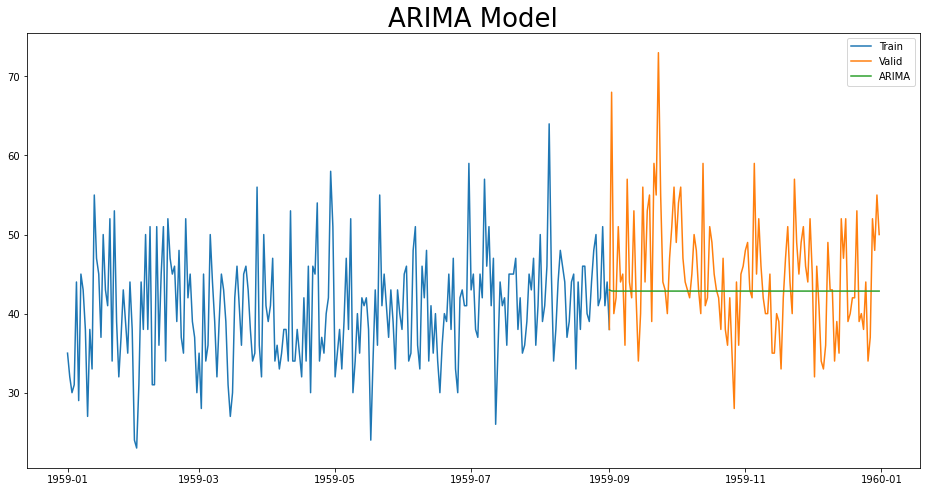

In [30]:
# Plotting
plt.figure(figsize=(16,8)) 
plt.plot( train['Births'], label='Train') 
plt.plot(test['Births'], label='Valid') 
plt.plot(y_hat['ARIMA'], label='ARIMA') 
plt.legend(loc='best') 
plt.title("ARIMA Model", size = 26)
plt.show()

In [31]:
y_hat

,Births,ARIMA
Date,,
1959-09-01,38,42.993940
1959-09-02,68,42.867940
1959-09-03,40,42.852159
1959-09-04,42,42.850183
1959-09-05,51,42.849936
...,...,...
1959-12-27,37,42.849900
1959-12-28,52,42.849900
1959-12-29,48,42.849900


In [33]:
# Calculating the RMSE for the model
rmse_arima = math.sqrt(mean_squared_error(test.Births, y_hat['ARIMA']))
print('RMSE for ARIMA is : ', rmse_arima)
r2_arima = r2_score(test.Births, y_hat['ARIMA'])
print('R2 Score for ARIMA is : ', r2_arima)

RMSE for ARIMA is :  7.672026359395598
R2 Score for ARIMA is :  -0.07711306817667984


In [100]:
# Creates Dataframe
res = {'R2_Score' : pd.Series([r2_naive, r2_SMA_3, r2_SMA_5, r2_SMA_10, r2_SES, r2_DES, r2_DES_Dam, r2_arima],
                       index =['Naive', 'SMA_3', 'SMA_5', 'SMA_10','SES', 'DES', 'DES_Damped','ARIMA']),
      'RMSE' : pd.Series([rmse_naive, rmse_SMA_3, rmse_SMA_5, rmse_SMA_10, rmse_SES, rmse_DES, rmse_DES_Dam,  rmse_arima],
                        index =['Naive', 'SMA_3', 'SMA_5', 'SMA_10','SES', 'DES', 'DES_Damped','ARIMA'])}

df_res = pd.DataFrame(res)
df_res.R2_Score = df_res.R2_Score*100
df_res

,R2_Score,RMSE
Naive,-87.165704,10.113293
SMA_3,44.749232,5.393282
SMA_5,29.716944,6.082881
SMA_10,20.570151,6.466598
SES,-15.578863,7.947282
DES,-8.074421,7.684947
DES_Damped,-32.266187,8.501662
ARIMA,-0.102469,21.208904


In [101]:
# Finding the best model
df_res.sort_values(by = "R2_Score", ascending=False)

,R2_Score,RMSE
SMA_3,44.749232,5.393282
SMA_5,29.716944,6.082881
SMA_10,20.570151,6.466598
ARIMA,-0.102469,21.208904
DES,-8.074421,7.684947
SES,-15.578863,7.947282
DES_Damped,-32.266187,8.501662
Naive,-87.165704,10.113293


##### The best model overall turns out to be simple moving average with 3 days as window. But this is because it's considering only very close values. To get a bit more generalized model some complex model can be used.